# Table E8
## Covariances between Image-expression Axes (IEAs), factor analysis axes (FAs), and PCA image-only axes (PCA-Is) on COPDGene visit 1 data. 

In [1]:
import numpy as np
import sys
sys.path.append("../../src/")
import utility
import pandas as pd

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from scipy.stats import kruskal
from statsmodels.stats.proportion import proportions_chisquare

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

import statsmodels.api as sm

from scipy import stats

import pandas as pd

import math


# Loading data

In [2]:
df_IEA_P1 = pd.read_csv("../../output/IEA_P1.csv").set_index("sid")
df_data = utility.load_data()
df_PCs = utility.load_SSL_PCs()

df_merged = pd.merge(df_data, df_IEA_P1, left_index = True, right_index = True)
df_merged = pd.merge(df_merged, df_PCs, left_index = True, right_index = True)




/ocean/projects/asc170022p/juc91/anaconda/envs/IEA/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
../../src/utility.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov[df_cov == ""] = "nan"
/ocean/projects/asc170022p/juc91/anaconda/envs/IEA/lib/python3.7/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [3]:
columns_used = ["IEA0", "IEA1", "PCA_emphysema_axis", "PCA_airway_axis", "PC0_P1", "PC1_P1"]
df_used = df_merged[ columns_used ]
df_used.loc[:, "PC0_P1"] = - df_used["PC0_P1"]

/ocean/projects/asc170022p/juc91/anaconda/envs/IEA/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Computing correlation coefficients and p-values

In [4]:
pearson_table = []

for iii in columns_used:
    tmp = []
    for jjj in columns_used:
        
        x = df_used[iii] 
        y = df_used[jjj]
        
        idx = np.bitwise_and(~np.isnan(x), ~np.isnan(y))
        
        r,p = pearsonr(x[idx], y[idx])
        tmp.append("{:.2f}".format(r))
        if p < .05:
            tmp[-1] += "*"
        if p < .01:
            tmp[-1] += "*"
        if p < .001:
            tmp[-1] += "*"
            
    pearson_table.append(tmp)
        
    
    

In [5]:
cov_names = ["IEA$_{emph}$", "IEA$_{airway}$", "FA$_{emph}$", "FA$_{airway}$", "PCA-I1", "PCA-I2"]

# Generating the table

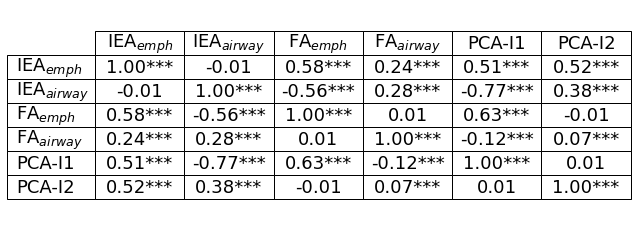

In [6]:
plt.figure(figsize=(8,4))
the_table=plt.table(cellText=pearson_table, rowLabels=cov_names, colLabels = cov_names,
                    colWidths = [.1]*len(pearson_table), loc='center',cellLoc = "center")
plt.axis('off')
the_table.auto_set_font_size(False)
the_table.set_fontsize(18)
the_table.scale(2, 2)